# <center>Scarf's algorithm</center>
### <center>Alfred Galichon (NYU & Sciences Po)</center>
## <center>'math+econ+code' masterclass series</center>
#### <center>With python code examples</center>
© 2018–2023 by Alfred Galichon. Past and present support from NSF grant DMS-1716489, ERC grant CoG-866274 are acknowledged, as well as inputs from contributors listed [here](http://www.math-econ-code.org/team).

**If you reuse material from this masterclass, please cite as:**<br>
Alfred Galichon, 'math+econ+code' masterclass series. https://www.math-econ-code.org/

# References

* Scarf. *The computation of economic equilibria* .
* Scarf. "The computation of equilibrium prices: an exposition." In the *Handbook of Mathematical Economics*.
* Codenotti. "Computational aspects of game theory." Lectures given at the Bertinoro summer school, 2011.

First, we load the libraries we shall need.

In [1]:
#!pip install anytree

#%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt
import math
from anytree import Node, RenderTree

## Simplical subdivisions

The simplex $S_{n}$ is the set of $x\in R^{n}$ such that $x_{i}\geq 0$ and $%
\sum_{i=1}^{n}x_{i}=1$.

When $n=3$, we can therefore represent the simplex by a two-dimensional
triangle. We shall work with $n=3$ from now on, although everything extends
without difficulties to any larger dimension.

A simplical subdivision of $S_{3}$ is a collection of triangles whose union
is $S_{3}$ and which are such that the intersection of any two of them is
either empty, or a full face of the two of them.

A simplical subdivision of $S_{3}$ is called restricted if the only vertices
of the subdivision which lie on the frontier of the larger rectangle are the
three unit vectors.

Consider a restricted simplical subdivision of the simplex $S_{n}$ (recall $%
n=3$), and assume it has no subdivision along the boundaries. Call $%
v^{1},...,v^{n}$ the unit vectors of the simplex, and $v^{n+1},...,v^{n+k}$
the interior vertices of the subdivision.



## Labelling

To each vertex $v$, we associate a label $l\left( v\right) \in \left\{
1,...,n\right\} $.

We impose $l\left( v^{i}\right) =i$ for $1\leq i\leq n$, and the labels of $%
v^{i},i>n$ are arbitrary.


A simplex is completely labelled if set of the label of its $n$ vertices is
exactly $\left\{ 1,...,n\right\} $.


Let's construct a `complex` class. Intially the complex is made of the external simplex. The complex has a tree structure, such that each complex that is not simplical contains three subcomplexes.

In [2]:
class Complex:
    def __init__(self):
        self.root = Node({0,1,2})
        self.vertices = [(0.0, 0.0), (4.0, 0.0), (2.0, 3.4641016151377544)]
        self.labels = [0, 1, 2]
        
    def print_tree(self):
        for pre, fill, node in RenderTree(self.root):
            print("%s%s" % (pre, node.name))
        
    def plot_complex(self,the_node = None, display_vertices = True ):
        if the_node is None:
            the_node = self.root
        if the_node.children == ():
            subdiv = the_node.name
            xs,ys = [self.vertices[i][0] for i in subdiv],[self.vertices[i][1] for i in subdiv]
            plt.plot(xs+[xs[0]],ys+[ys[0]],'b')
            for i,x,y in zip(list(subdiv),xs,ys):
                plt.plot(x, y, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="green")
                if display_vertices:
                    thetag = 'v'+str(i)+':'+str(self.labels[i])
                else:
                    thetag = str(self.labels[i])
                plt.text(x+0.05, y+0.05, thetag, fontsize=10) 
        else:
            for child in the_node.children:
                self.plot_complex(child,display_vertices)

The initial complex has labels 0, 1 and 2.

{0, 1, 2}


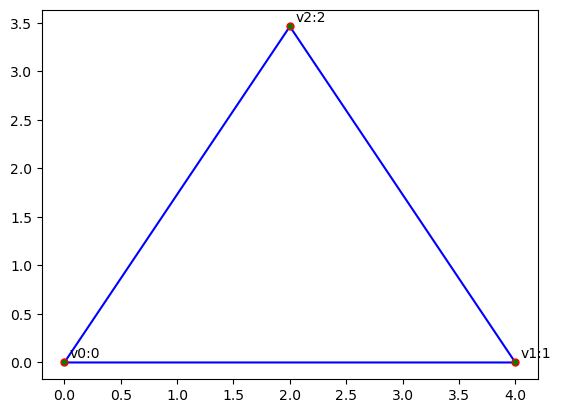

In [3]:
complex_example = Complex()
complex_example.print_tree()
complex_example.plot_complex()

In order to refine a complex, we input coordinates, and we determine in which simplical subdivision it is among the descendants of node `thenode`:

In [4]:
def Complex_where_is(self,the_node,coord):
    x,y=coord
    if the_node.children == ():
        subdiv = the_node.name
        [(x1,y1),(x2,y2),(x3,y3)] = [(self.vertices[i][0],self.vertices[i][1]) for i in subdiv]
        c1 = (x2-x1)*(y-y1)-(y2-y1)*(x-x1)
        c2 = (x3-x2)*(y-y2)-(y3-y2)*(x-x2)
        c3 = (x1-x3)*(y-y3)-(y1-y3)*(x-x3)
        if (c1<0 and c2<0 and c3<0) or (c1>0 and c2>0 and c3>0):
            return the_node
        else:
            return False
    else:
        for child in the_node.children:
            location = self.where_is(child,coord)
            if location:
                return(location)
        return False

Complex.where_is = Complex_where_is



We use the previous procedure to add a vertex (and its corresponding label) to the complex.

In [5]:
def Complex_add_vertex(self,vertex,label):
    x,y = vertex
    subdiv = self.where_is(self.root,(x,y))
    i = len(self.vertices)
    for j in subdiv.name:
        smaller = Node( subdiv.name.union({i}) - {j},parent = subdiv)
    self.vertices.append((x,y))
    self.labels.append(label)

Complex.add_vertex = Complex_add_vertex

{0, 1, 2}
├── {1, 2, 3}
├── {0, 2, 3}
└── {0, 1, 3}


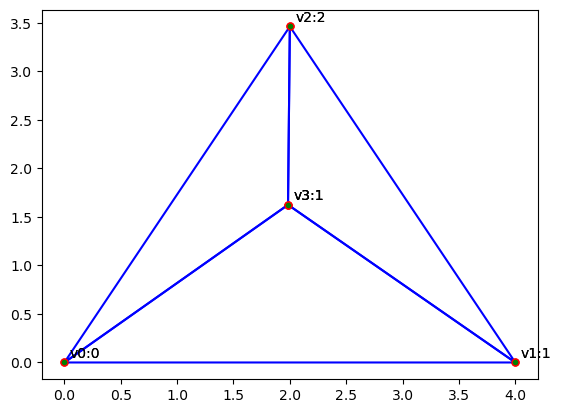

In [6]:
complex_example = Complex()
complex_example.add_vertex((1.9838109204056043, 1.6256905459087383),1)
complex_example.plot_complex()
complex_example.print_tree()

In [7]:
def Complex_add_vertices(self,vertices,labels):
    for v,l in zip(vertices,labels):
        self.add_vertex(v,l)

Complex.add_vertices = Complex_add_vertices

{0, 1, 2}
├── {1, 2, 3}
│   ├── {2, 3, 6}
│   ├── {1, 3, 6}
│   └── {1, 2, 6}
├── {0, 2, 3}
│   ├── {2, 3, 5}
│   ├── {0, 3, 5}
│   └── {0, 2, 5}
└── {0, 1, 3}
    ├── {1, 3, 4}
    ├── {0, 3, 4}
    └── {0, 1, 4}


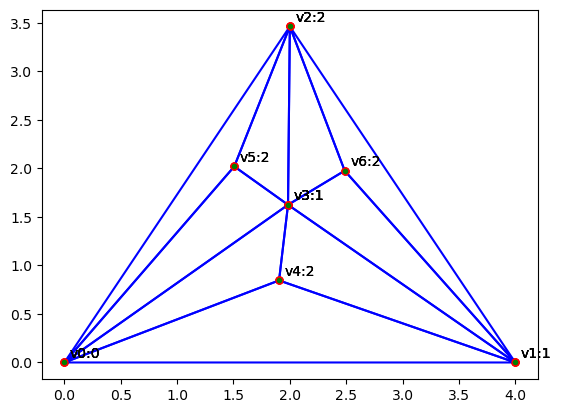

In [8]:
vertices = [(1.9838109204056043, 1.6256905459087383),
 (1.9042334351278964, 0.8458932599902984),
 (1.5071691386863257, 2.0210807190504823),
 (2.486580756068415, 1.9771484775902883)]

labels = [ 1, 2, 2, 2]

complex_example = Complex()
complex_example.add_vertices(vertices,labels)
complex_example.plot_complex()
complex_example.print_tree()

# Inputting the vertices and labels graphically

In [9]:
def prompt_unlabelled_complex():
    plt.rcParams["figure.figsize"] = [4.00, 4.00]
    plt.rcParams["figure.autolayout"] = True

    fig = plt.figure()
    the_complex = Complex()
    plt.plot( [x for (x,y) in the_complex.vertices]+[0.0],[y for (x,y) in the_complex.vertices]+[0.0])

    def mouse_event(event):
        x,y = event.xdata,event.ydata
        plt.plot(x, y, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="green")
        plt.text(x+0.05, y+0.05, 'v'+str(len(the_complex.vertices)), fontsize=10)        
        the_complex.add_vertex((x,y),0)

    cid = fig.canvas.mpl_connect('button_press_event', mouse_event)

    return the_complex 


def prompt_labels(the_complex):
    for i in range(3,len(the_complex.vertices)):
        label = int(input ("Enter a lablel for vertex "+str(i)+": "))
        if label  not in {0,1,2}:
            raise Exception('Not in {0,1,2}')
        the_complex.labels[i]=label


# HERE, IT WOULD BE NICE TO PROMPT FOR THE LABELS INTERACTIVELY

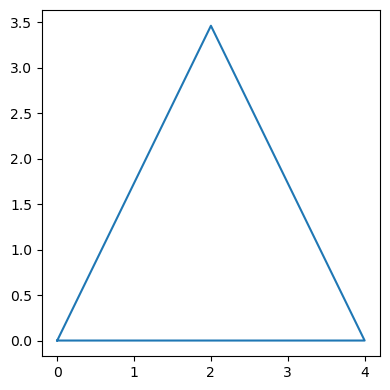

In [10]:
prompted_complex = prompt_unlabelled_complex()

In [11]:
prompt_labels(prompted_complex)


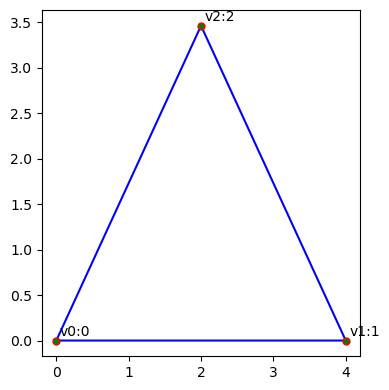

In [12]:
prompted_complex.plot_complex()

# Scarf's algorithm

In [13]:
def Complex_scarf_solve(self,keep_track = False):
        if {self.labels[i] for i in self.root.name}!={0,1,2}:
            raise Exception('Original simplex not completely labelled.')
        subdivision = [leave.name for leave in self.root.leaves if {1,2}.issubset(leave.name)][0]
        i = list(subdivision-{1,2})[0] # i is the vertex that just arrived
        if keep_track:
            subdivisions = [subdivision]
            
        while {self.labels[k] for k in subdivision}!={0,1,2}:
            iprime = [k for k in (subdivision-{i}) if self.labels[k]==self.labels[i]][0] # iprime is the label that will exit
            new_subdivision = [leave.name for leave in self.root.leaves if ((subdivision - {iprime}).issubset(leave.name)
                                 and leave.name != subdivision)][0]
            i = min(new_subdivision - subdivision)
            subdivision = new_subdivision
            if keep_track:
                subdivisions.append(subdivision)

        if keep_track:
            return subdivision,subdivisions 
        else:
            return subdivision
        
Complex.scarf_solve=Complex_scarf_solve

In [14]:
complex_example.scarf_solve(True)

({0, 3, 5}, [{1, 2, 6}, {1, 3, 6}, {2, 3, 6}, {2, 3, 5}, {0, 3, 5}])

In [15]:
def Complex_plot_path(self):
    _,subdivisions = self.scarf_solve(True)
    print(vertices)
    print(subdivisions)
    x = np.array([sum([self.vertices[v][0] for v in {1,2}])/2]+ [ sum([self.vertices[v][0] for v in sub])/3 for sub in subdivisions])
    y = np.array([sum([self.vertices[v][1] for v in {1,2}])/2]+  [ sum([self.vertices[v][1] for v in sub])/3 for sub in subdivisions])
    self.plot_complex()
    plt.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], color='green', scale_units='xy', angles='xy', scale=1)
    
Complex.plot_path = Complex_plot_path

[(1.9838109204056043, 1.6256905459087383), (1.9042334351278964, 0.8458932599902984), (1.5071691386863257, 2.0210807190504823), (2.486580756068415, 1.9771484775902883)]
[{1, 2, 6}, {1, 3, 6}, {2, 3, 6}, {2, 3, 5}, {0, 3, 5}]


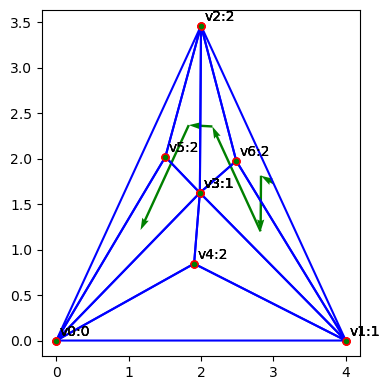

In [16]:
complex_example.plot_path()